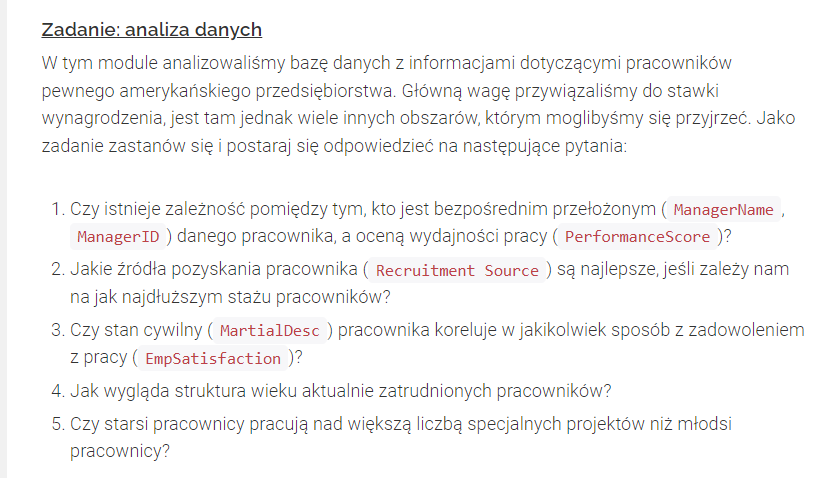

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt
import numpy as np

In [163]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


<Axes: >

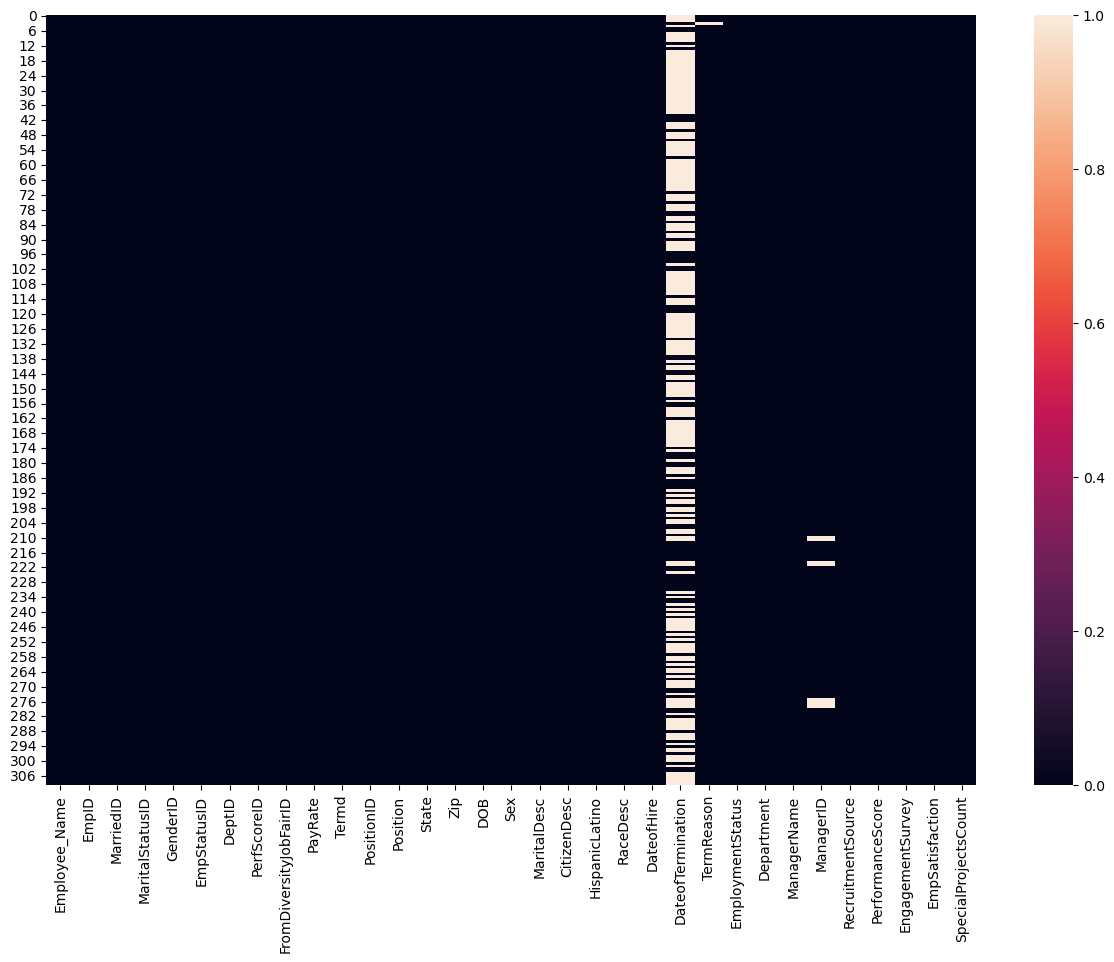

In [164]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2, inplace=True)
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())

In [165]:
pd.crosstab(df['ManagerName'], df['PerformanceScore'])

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


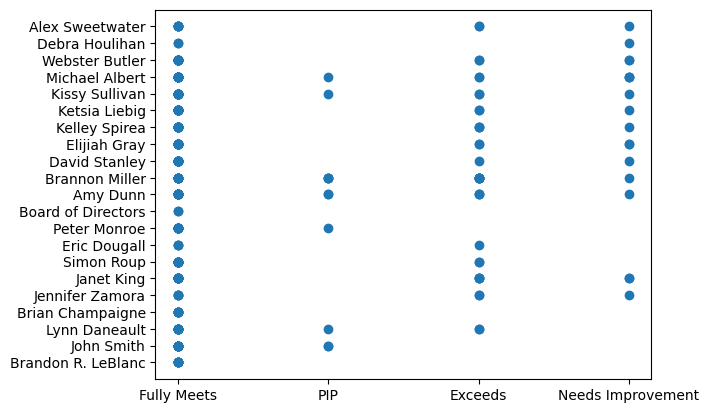

In [166]:
plt.scatter(df['PerformanceScore'], df['ManagerName'])

### 1. Nie widać zależności między konkretnym managerem a wydajnością pracowników, wyniki są porównywalne i zróżnicowane dla wszystkich.

In [167]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [168]:
def count_seniority(row):
    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']
    return (end_date - row['DateofHire']) / np.timedelta64(1,'D') / 365
    

In [169]:
df['Seniority'] =  df.apply(lambda row: count_seniority(row),axis=1)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.997260
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158904
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.410959


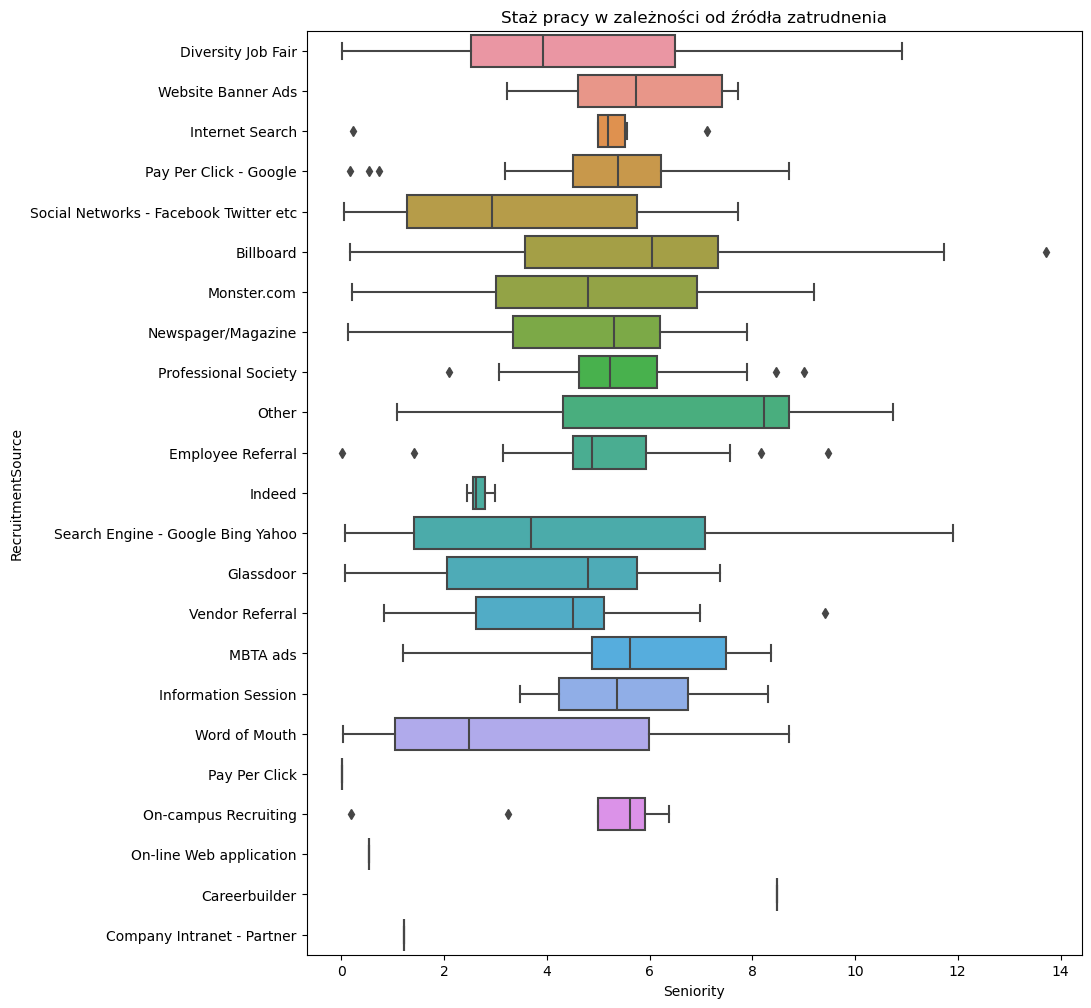

In [170]:
plt.figure(figsize=(10,12))
sns.boxplot(y='RecruitmentSource', x='Seniority', data=df)
plt.title('Staż pracy w zależności od źródła zatrudnenia')
plt.show()

Text(0.5, 1.0, 'Staż pracy w zależności od źródła zatrudnenia')

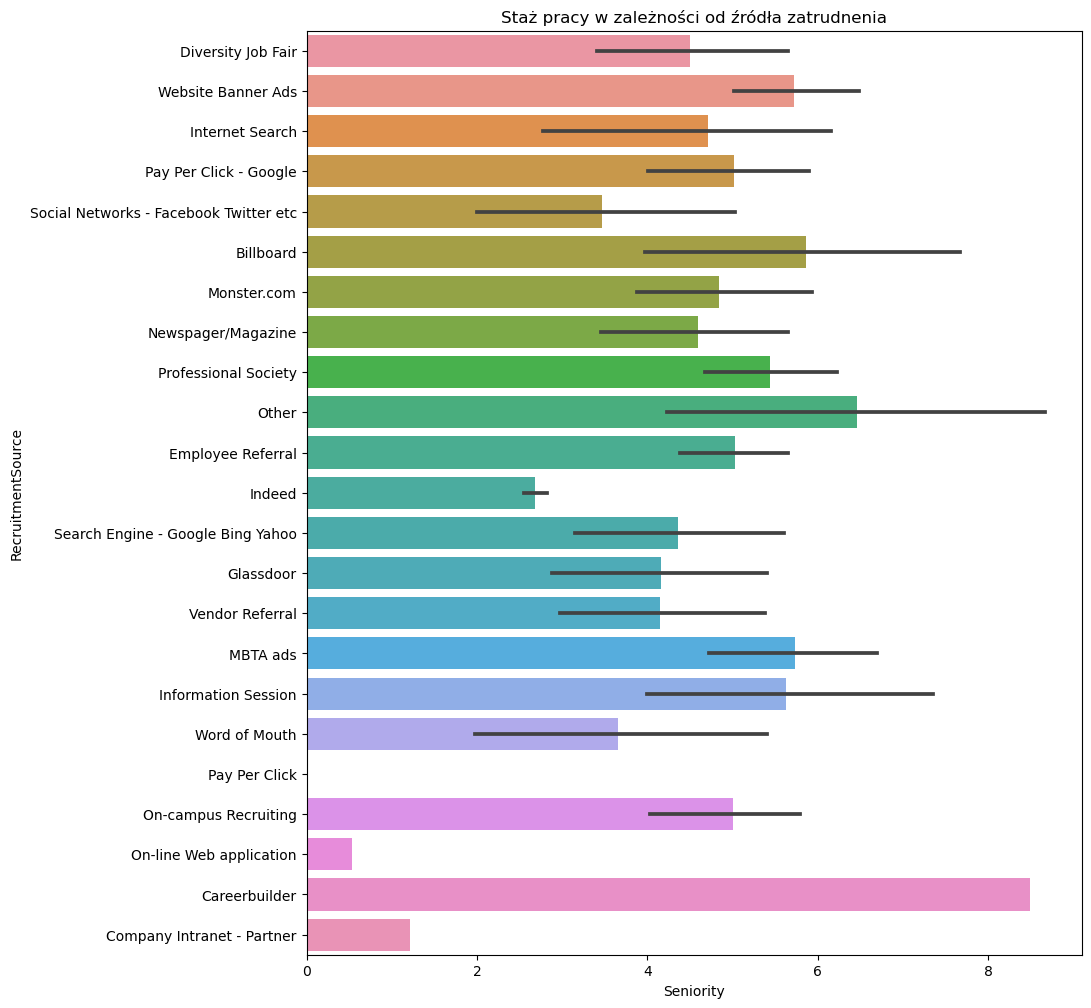

In [171]:
plt.figure(figsize=(10,12))
sns.barplot(y='RecruitmentSource', x='Seniority', data=df)
plt.title('Staż pracy w zależności od źródła zatrudnenia')

In [172]:
df.groupby('RecruitmentSource')['Seniority'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
RecruitmentSource,,,,,,,,
Pay Per Click,1.0,0.005479,NaN,0.005479,0.005479,0.005479,0.005479,0.005479
On-line Web application,1.0,0.531507,NaN,0.531507,0.531507,0.531507,0.531507,0.531507
Company Intranet - Partner,1.0,1.216438,NaN,1.216438,1.216438,1.216438,1.216438,1.216438
Indeed,8.0,2.678082,0.213005,2.438356,2.569863,2.620548,2.786986,2.986301
Social Networks - Facebook Twitter etc,11.0,3.466999,2.887275,0.052055,1.279452,2.931507,5.749315,7.720548
Word of Mouth,13.0,3.649737,3.117769,0.021918,1.035616,2.487671,5.994521,8.717808
Vendor Referral,15.0,4.146301,2.375619,0.819178,2.624658,4.498630,5.110959,9.413699
Glassdoor,14.0,4.157926,2.470593,0.073973,2.045205,4.805479,5.747945,7.375342
Search Engine - Google Bing Yahoo,25.0,4.363178,3.239654,0.071233,1.408219,3.690411,7.076712,11.901370


#### 2. Najlepszymi źródłami pozyskania pracownika są: Carrierbuilder, Other, Billboard oraz MBTA ads. Przy czym za pośrednictwem Carrerbuilder zatrudniono tylko 1 osobę, a pozostałe źródła są bardziej powszechne.

Text(0.5, 1.0, 'Rozkład zadowolenia pracowników w zależności od stanu cywilnego')

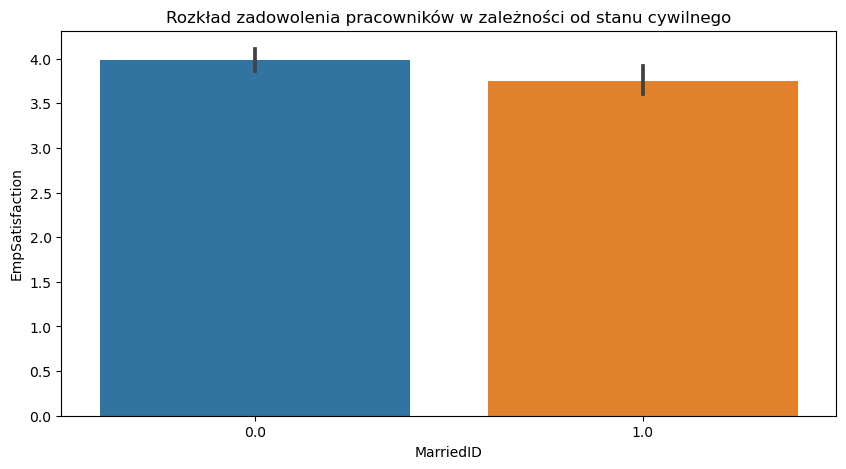

In [173]:
plt.figure(figsize=(10, 5))
sns.barplot(x='MarriedID', y='EmpSatisfaction', data=df)
plt.title('Rozkład zadowolenia pracowników w zależności od stanu cywilnego')

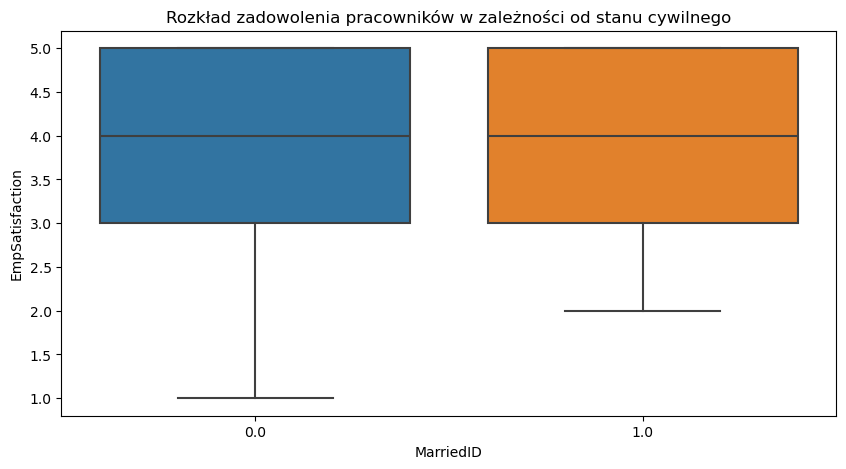

In [174]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='MarriedID', y='EmpSatisfaction')
plt.title('Rozkład zadowolenia pracowników w zależności od stanu cywilnego')
plt.show()


### 3. Nie widać znaczącej różnicy satysfakcji z pracy w zależności od stanu cywilnego. 

In [175]:
def count_age(row):
    current_date = dt.datetime(2019,9,27)
    return (current_date - row['DOB']) / np.timedelta64(1,'D') / 365

In [176]:
df['age'] = df.apply(lambda row: count_age(row), axis=1)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,Seniority,age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,10.923288,31.863014
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,5.726027,35.443836
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,4.997260,33.093151
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,0.158904,34.052055
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,4.410959,31.378082


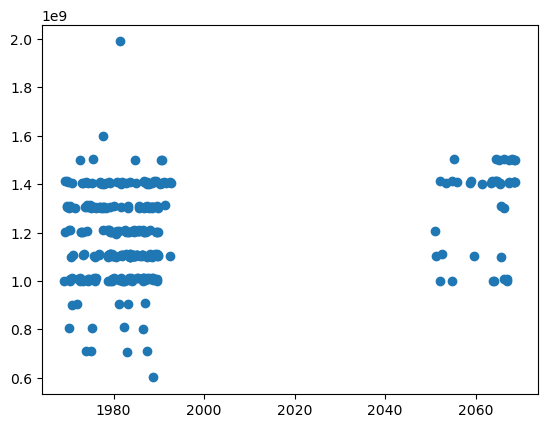

In [177]:
plt.scatter(df['DOB'], df['EmpID'])

In [178]:
cleaned_age =df[df['age'] > 0]

C:\Users\User\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


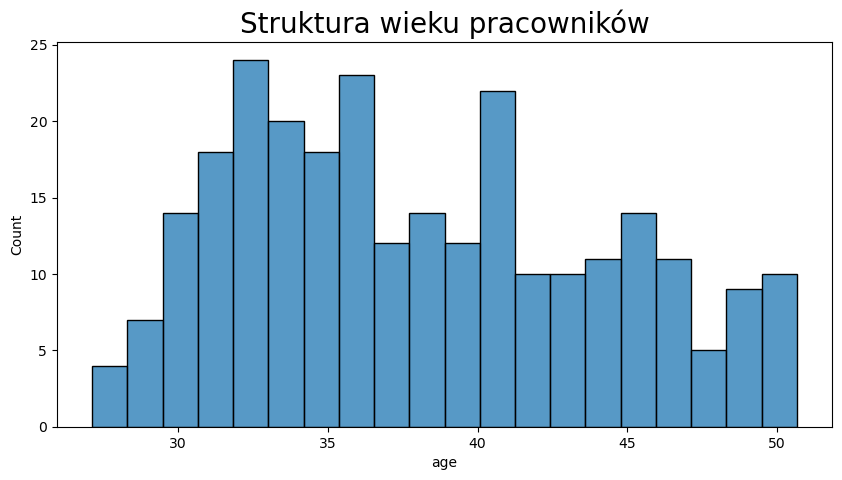

In [179]:
plt.figure(figsize=(10,5))
sns.histplot(cleaned_age['age'], bins=20)
plt.title('Struktura wieku pracowników', size=20)
plt.show()

In [180]:
cleaned_age['age'].describe()

count    268.000000
mean      38.099836
std        6.040736
min       27.128767
25%       33.069863
50%       37.045205
75%       42.602055
max       50.663014
Name: age, dtype: float64

### 4. Średni wiek pracowników to 38 lat. Najstarsza osoba ma 50 lat, a najmłodsza 27.

In [186]:
cleaned_age['AgeGroup'] = pd.cut(cleaned_age['age'], bins=[20,30,40,50])



C:\Users\User\AppData\Local\Temp\ipykernel_5396\149969890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_age['AgeGroup'] = pd.cut(cleaned_age['age'], bins=[20,30,40,50])


C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


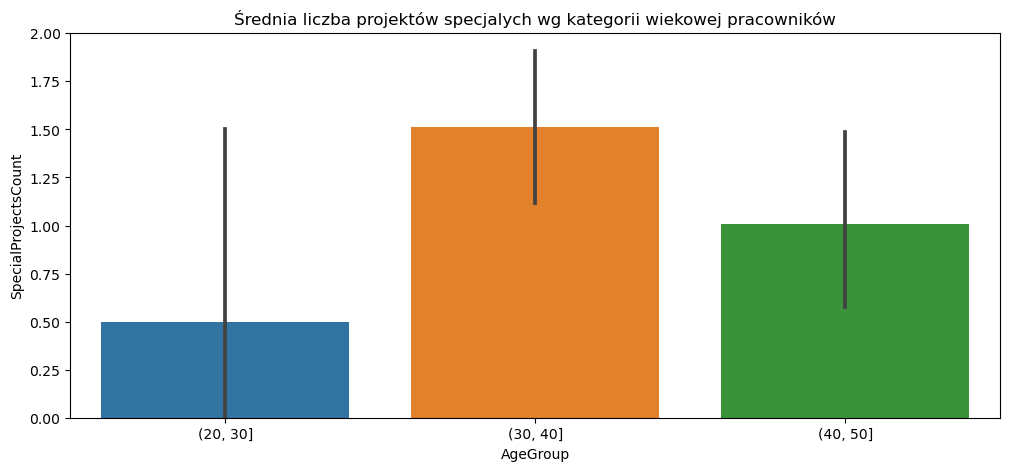

In [187]:
plt.figure(figsize=(12,5))
sns.barplot(x='AgeGroup', y='SpecialProjectsCount', data=cleaned_age)
plt.title('Średnia liczba projektów specjalych wg kategorii wiekowej pracowników')
plt.show()

### 5. Starsi pracownicy nie pracują nad większą liczbą projektów specjalnych.